In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from tensorflow import keras
from keras import layers

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
X = pd.read_csv('dataFilt.csv', index_col=0)
X = X.T
X.index.name = 'bcr_patient_barcode'
display(X.head())
display(X.shape)

index,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001617,ENSG00000001630,...,ENSG00000288661,ENSG00000288662,ENSG00000288663,ENSG00000288665,ENSG00000288667,ENSG00000288669,ENSG00000288670,ENSG00000288671,ENSG00000288674,ENSG00000288675
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,0,1225,492,151,103,835,154,685,99,72,...,0,0,14,0,0,0,240,0,1,2
TCGA-2Y-A9GS-01A-12R-A38B-07,0,1209,478,346,44,908,299,540,136,207,...,0,0,8,0,0,0,220,0,4,6
TCGA-2Y-A9GT-01A-11R-A38B-07,3,1025,538,79,65,740,94,608,184,89,...,0,0,9,0,0,1,306,0,3,6
TCGA-2Y-A9GU-01A-11R-A38B-07,0,1897,1059,232,30,1138,71,893,143,308,...,0,0,8,0,0,0,1026,0,5,0
TCGA-2Y-A9GV-01A-11R-A38B-07,7,974,670,279,36,1038,208,632,180,260,...,0,0,16,0,0,0,387,0,2,7


(421, 36944)

In [4]:
y = pd.read_csv('y.csv', header=None)
y.value_counts()

TP    371
NT     50
dtype: int64

In [5]:
y = np.array(y).ravel()
display(y.shape)

(421,)

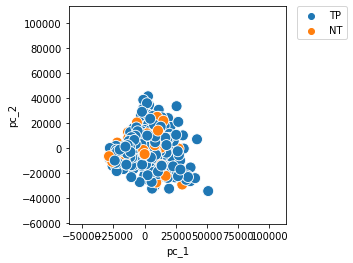

In [6]:
pca = PCA(n_components = 0.95)
reduced = pca.fit_transform(X)
reduced_df = pd.DataFrame({'pc_1': reduced[:,0], 'pc_2': reduced[:,1], 'label': y.reshape(-1)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='pc_1', y='pc_2', hue='label', data=reduced_df, ax=ax,s=120)
lim = (reduced.min()-5, reduced.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [7]:
def scale_to_rgb(float_array):
    scaled = float_array/255
    rounded_up = (np.ceil(scaled)).astype(int)
    # print(rounded_up.dtype)
    return rounded_up

In [8]:
# transform each row in the dataset into an image

# create a 2d array of 0s that has the dimensions (sqrt(data.shape[1]), sqrt(data.shape(1)))
def reshape_df(data):
    if (math.sqrt(data.shape[1])).is_integer() == False:
        dim = math.ceil(math.sqrt(data.shape[1]))
    else: 
        dim = math.sqrt(data.shape[1])
    
    imgs = []
    zeros = [0] * (dim ** 2 - data.shape[1])

    for row in range(len(data)):
        # reshapes sample to image
        sample = data.iloc[row,:].values.tolist()
        sample += zeros 
        sample = np.reshape(a=sample, newshape=(dim, dim))
        sample = scale_to_rgb(sample)
        imgs.append(sample)
        
    return imgs

In [9]:
imgs = reshape_df(X)
display(len(imgs))

421

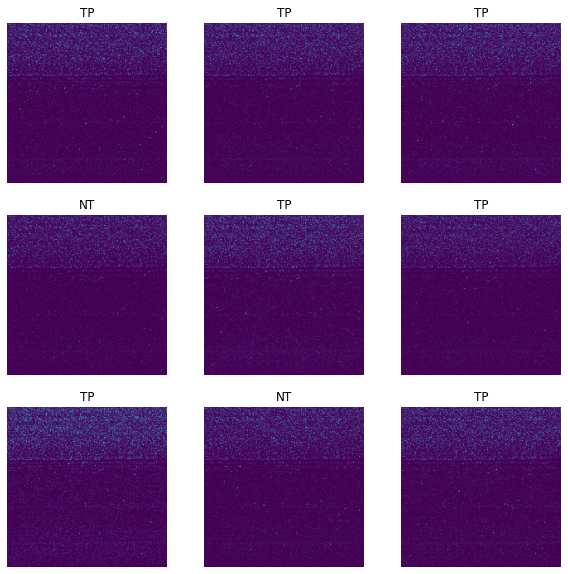

In [10]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(imgs[i].astype("uint8"))
    plt.title(y[i])
    plt.axis("off")

In [11]:
model = tf.keras.models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(4, 4), strides=(1,1), padding='same', activation='relu', input_shape=(193, 193, 1)))
model.add(layers.Conv2D(128, kernel_size=(2, 2), strides=(1, 1), padding="same", activation='relu'))
model.add(layers.Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding="same", activation='relu'))

model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.BatchNormalization(epsilon=1e-05, momentum=0.1))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 193, 193, 64)      1088      
                                                                 
 conv2d_1 (Conv2D)           (None, 193, 193, 128)     32896     
                                                                 
 conv2d_2 (Conv2D)           (None, 193, 193, 256)     33024     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 256)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 256)      1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 96, 96, 256)       0

In [12]:
from sklearn.preprocessing import LabelEncoder
X = np.array(imgs)
le = LabelEncoder()
# encoder and return encoded label
labels = le.fit_transform(y)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'NT': 0, 'TP': 1}


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

display(X_train.shape)
display(y_train.shape)

(294, 193, 193)

(294,)

In [14]:
from sklearn.utils import class_weight

cls_wt = class_weight.compute_class_weight(class_weight='balanced', 
                                  classes = np.unique(y_train), 
                                  y = y_train)

class_weights = {0: cls_wt[0], 1:cls_wt[1]}

print('class weights:', class_weights)

class weights: {0: 4.2, 1: 0.5675675675675675}


In [15]:
history = model.fit(
        X_train,
        y_train,
        class_weight=class_weights,
        epochs=20,
        validation_data=(X_test, y_test)
    )

Epoch 1/20
10/10 [==============================] - 9s 288ms/step - loss: 7.5541 - accuracy: 0.5612 - val_loss: 8.6170 - val_accuracy: 0.1181
Epoch 2/20
10/10 [==============================] - 2s 178ms/step - loss: 3.5617 - accuracy: 0.5578 - val_loss: 2.1652 - val_accuracy: 0.3780
Epoch 3/20
10/10 [==============================] - 2s 177ms/step - loss: 0.4828 - accuracy: 0.8095 - val_loss: 1.1602 - val_accuracy: 0.6929
Epoch 4/20
10/10 [==============================] - 2s 176ms/step - loss: 0.3600 - accuracy: 0.8912 - val_loss: 1.0671 - val_accuracy: 0.8819
Epoch 5/20
10/10 [==============================] - 2s 175ms/step - loss: 0.2468 - accuracy: 0.9218 - val_loss: 0.8012 - val_accuracy: 0.7638
Epoch 6/20
10/10 [==============================] - 2s 179ms/step - loss: 0.1210 - accuracy: 0.9592 - val_loss: 1.1734 - val_accuracy: 0.5906
Epoch 7/20
10/10 [==============================] - 2s 178ms/step - loss: 0.1210 - accuracy: 0.9490 - val_loss: 1.2781 - val_accuracy: 0.6063
Epoch 

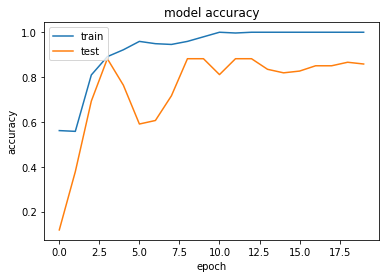

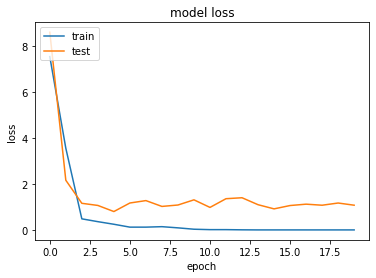

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

4/4 [==============================] - 0s 30ms/step


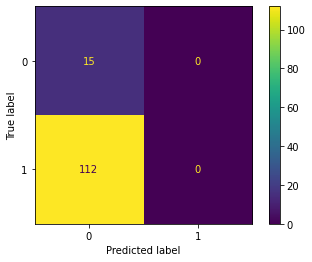

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test,y_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_mtx)
cmd.plot()

In [18]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
report = classification_report(y_test, y_pred_classes)
print(report)

4/4 [==============================] - 0s 30ms/step
              precision    recall  f1-score   support

           0       0.12      1.00      0.21        15
           1       0.00      0.00      0.00       112

    accuracy                           0.12       127
   macro avg       0.06      0.50      0.11       127
weighted avg       0.01      0.12      0.02       127



/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share/pkg.7/python3/3.10.5/install/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le